### Residuals from M2 and M3 with parameter values estimated in PyTorch

In [1]:
import torch
import pandas as pd
import models
import matplotlib.pyplot as plt

In [2]:
def read_data(path='data/nf_ex1.csv'):
    df = pd.read_csv(path, sep=';', index_col=0)
    y = df[['u', 'x1', 'x3']].values
    y = torch.tensor(y, dtype=torch.float32)
    return df, y

def train_model(model, y, num_epochs=10):
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
    state = torch.zeros(3, 1)
    for i in range(num_epochs):
        num_samples = len(y)
        for j in range(len(y)):
            # Forward pass      
            state, r = model(y[j], state)
            # Compute loss
            loss = r ** 2
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Print progress
            if (j+1) % 20 == 0:
                print (f'Epoch [{i * num_samples + j + 1}/{num_samples * num_epochs}], Loss: {loss.item():.4f}')

def predict(model, y):
    states = []
    rs = []
    state = torch.zeros(3, 1)
    for i in range(len(y)):
        state, r = model(y[i], state)
        states.append(state.detach().numpy())
        rs.append(r[0][0].detach().numpy())
    states = pd.DataFrame(states, columns=['x1', 'x2', 'x3'])
    states['r'] = rs
    return states

In [3]:
df_nf, y_train = read_data()
df_f1, y_f1 = read_data('data/f1_ex1.csv')
df_f2, y_f2 = read_data('data/f2_ex1.csv')

#### ResGen2

In [4]:
# training can be numerically unstable - seed selected for a stable run
# remark: this can be in general not reproducible on others systems/processors/pytorch versions
# in that case please try another seed values
torch.manual_seed(4);

In [5]:
model1 = models.ResGen2()
train_model(model1, y_train)

Epoch [20/1990], Loss: 0.9319
Epoch [40/1990], Loss: 0.2806
Epoch [60/1990], Loss: 0.0818
Epoch [80/1990], Loss: 0.1575
Epoch [100/1990], Loss: 0.0967
Epoch [120/1990], Loss: 0.0000
Epoch [140/1990], Loss: 0.0301
Epoch [160/1990], Loss: 0.0718
Epoch [180/1990], Loss: 0.0000
Epoch [219/1990], Loss: 0.0238
Epoch [239/1990], Loss: 0.0687
Epoch [259/1990], Loss: 0.0298
Epoch [279/1990], Loss: 0.0208
Epoch [299/1990], Loss: 0.0422
Epoch [319/1990], Loss: 0.0220
Epoch [339/1990], Loss: 0.0209
Epoch [359/1990], Loss: 0.0249
Epoch [379/1990], Loss: 0.0002
Epoch [418/1990], Loss: 0.0465
Epoch [438/1990], Loss: 0.0263
Epoch [458/1990], Loss: 0.0173
Epoch [478/1990], Loss: 0.0131
Epoch [498/1990], Loss: 0.0150
Epoch [518/1990], Loss: 0.0128
Epoch [538/1990], Loss: 0.0093
Epoch [558/1990], Loss: 0.0072
Epoch [578/1990], Loss: 0.0000
Epoch [617/1990], Loss: 0.0599
Epoch [637/1990], Loss: 0.0094
Epoch [657/1990], Loss: 0.0083
Epoch [677/1990], Loss: 0.0077
Epoch [697/1990], Loss: 0.0047
Epoch [717/1

In [6]:
# x2 = 10.0*dx3 + 2.0*x3 # e3
print("x2 (x3, dx3) ", model1.linear1.weight.detach().numpy())
print("x2 bias ", model1.linear1.bias.detach().numpy())
# dx1 = u - 0.2*x1 - 0.1*x2 # e1
print("dx1 (u, x1, x2) ", model1.linear2.weight.detach().numpy())
print("dx1 bias ", model1.linear2.bias.detach().numpy())

x2 (x3, dx3)  [[-0.5799936  -0.98561084]]
x2 bias  [0.]
dx1 (u, x1, x2)  [[ 1.1809189  -0.31926236 -0.578246  ]]
dx1 bias  [-0.00111725]


In [7]:
states_nf = predict(model1, y_train)
states_f1 = predict(model1, y_f1)
states_f2 = predict(model1, y_f2)

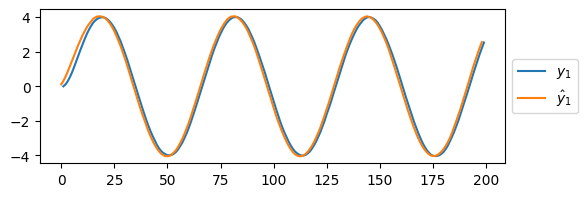

In [8]:
# x1 estimation by ResGen2
plt.figure(figsize=(6, 2))
plt.plot(df_nf['x1'], label='$y_1$');
plt.plot(states_nf['x1'], label='$\hat{y}_1$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

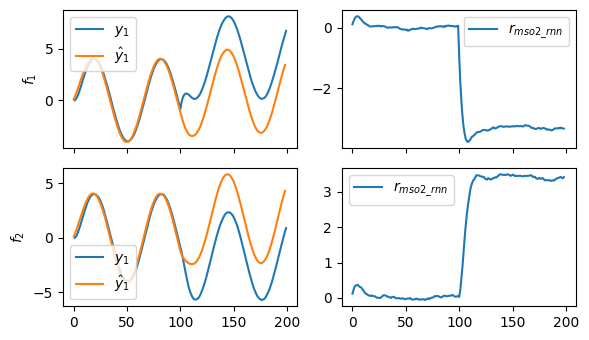

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x1'], label='$y_1$')
axs[0, 0].plot(states_f1['x1'], label='$\hat{y}_1$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(states_f1['r'], label='$r_{mso2\_rnn}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x1'], label='$y_1$')
axs[1, 0].plot(states_f2['x1'], label='$\hat{y}_1$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(states_f2['r'], label='$r_{mso2\_rnn}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso1_rnn_seed4.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
torch.manual_seed(3);
model1 = models.ResGen2()
train_model(model1, y_train)

Epoch [20/1990], Loss: 0.0167
Epoch [40/1990], Loss: 2.7058
Epoch [60/1990], Loss: 1.0651
Epoch [80/1990], Loss: 0.0618
Epoch [100/1990], Loss: 1.6436
Epoch [120/1990], Loss: 1.4790
Epoch [140/1990], Loss: 0.2420
Epoch [160/1990], Loss: 1.5981
Epoch [180/1990], Loss: 0.8144
Epoch [219/1990], Loss: 0.8011
Epoch [239/1990], Loss: 0.6699
Epoch [259/1990], Loss: 1.1588
Epoch [279/1990], Loss: 0.0260
Epoch [299/1990], Loss: 0.6802
Epoch [319/1990], Loss: 0.3353
Epoch [339/1990], Loss: 0.0700
Epoch [359/1990], Loss: 0.4813
Epoch [379/1990], Loss: 0.1255
Epoch [418/1990], Loss: 0.3113
Epoch [438/1990], Loss: 0.2561
Epoch [458/1990], Loss: 0.2608
Epoch [478/1990], Loss: 0.0159
Epoch [498/1990], Loss: 0.1678
Epoch [518/1990], Loss: 0.0155
Epoch [538/1990], Loss: 0.0146
Epoch [558/1990], Loss: 0.0825
Epoch [578/1990], Loss: 0.0166
Epoch [617/1990], Loss: 0.1706
Epoch [637/1990], Loss: 0.0713
Epoch [657/1990], Loss: 0.0521
Epoch [677/1990], Loss: 0.0225
Epoch [697/1990], Loss: 0.0188
Epoch [717/1

In [11]:
states_nf = predict(model1, y_train)
states_f1 = predict(model1, y_f1)
states_f2 = predict(model1, y_f2)

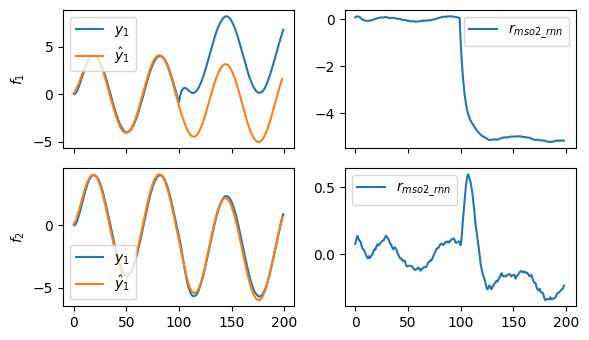

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x1'], label='$y_1$')
axs[0, 0].plot(states_f1['x1'], label='$\hat{y}_1$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(states_f1['r'], label='$r_{mso2\_rnn}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x1'], label='$y_1$')
axs[1, 0].plot(states_f2['x1'], label='$\hat{y}_1$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(states_f2['r'], label='$r_{mso2\_rnn}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso1_rnn_seed3.pdf', dpi=300, bbox_inches='tight')
plt.show()

#### ResGen3

In [13]:
torch.manual_seed(13);

In [14]:
model2 = models.ResGen3()
train_model(model2, y_train)

Epoch [20/1990], Loss: 11.9234
Epoch [40/1990], Loss: 3.1086
Epoch [60/1990], Loss: 4.0523
Epoch [80/1990], Loss: 10.4729
Epoch [100/1990], Loss: 0.6836
Epoch [120/1990], Loss: 6.5991
Epoch [140/1990], Loss: 7.9206
Epoch [160/1990], Loss: 0.0092
Epoch [180/1990], Loss: 8.5859
Epoch [219/1990], Loss: 8.8769
Epoch [239/1990], Loss: 2.6603
Epoch [259/1990], Loss: 2.5325
Epoch [279/1990], Loss: 7.1240
Epoch [299/1990], Loss: 0.7113
Epoch [319/1990], Loss: 3.7822
Epoch [339/1990], Loss: 4.9656
Epoch [359/1990], Loss: 0.0269
Epoch [379/1990], Loss: 4.1362
Epoch [418/1990], Loss: 3.6529
Epoch [438/1990], Loss: 2.0070
Epoch [458/1990], Loss: 0.2682
Epoch [478/1990], Loss: 2.0849
Epoch [498/1990], Loss: 1.0423
Epoch [518/1990], Loss: 0.2463
Epoch [538/1990], Loss: 1.3520
Epoch [558/1990], Loss: 0.6984
Epoch [578/1990], Loss: 0.2471
Epoch [617/1990], Loss: 0.3206
Epoch [637/1990], Loss: 1.3807
Epoch [657/1990], Loss: 0.1544
Epoch [677/1990], Loss: 0.4148
Epoch [697/1990], Loss: 0.9270
Epoch [717

In [57]:
# dx1 = u - 0.2*x1 - 0.1*x2 # e1
print("dx1 (u, x1, x2, x3) weights: ", model2.linear1.weight.detach().numpy())
print("dx1 bias ", model2.linear1.bias.detach().numpy())
# dx2 = 0.1*x1 - 0.2*x2 - 0.1*x3 # e2
print("dx2 (u, x1, x2, x3) weights:", model2.linear2.weight.detach().numpy())
print("dx2 bias ", model2.linear2.bias.detach().numpy())

dx1 (u, x1, x2, x3) weights:  [[0.82386637 0.08149108 0.4490807  1.0705624 ]]
dx1 bias  [-3.5246194e-05]
dx2 (u, x1, x2, x3) weights: [[ 0.06957269 -0.46106935 -0.49396634 -0.3219942 ]]
dx2 bias  [0.]


In [58]:
states_nf = predict(model2, y_train)
states_f1 = predict(model2, y_f1)
states_f2 = predict(model2, y_f2)

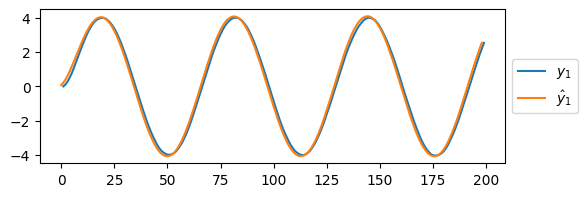

In [15]:
# x1 estimation by ResGen3
plt.figure(figsize=(6, 2))
plt.plot(df_nf['x1'], label='$y_1$');
plt.plot(states_nf['x1'], label='$\hat{y}_1$');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

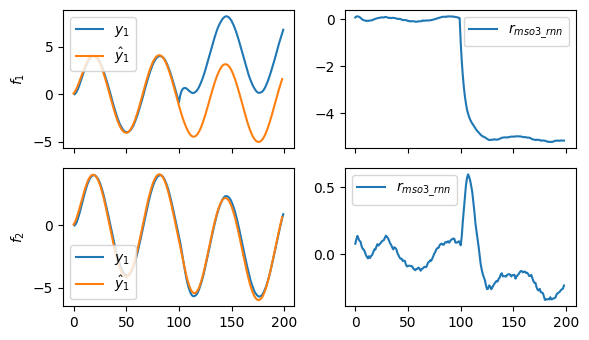

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(6, 3.5), sharex=True)

axs[0, 0].plot(df_f1['x1'], label='$y_1$')
axs[0, 0].plot(states_f1['x1'], label='$\hat{y}_1$')
axs[0, 0].legend()
axs[0, 0].set_ylabel('$f_1$')
axs[0, 1].plot(states_f1['r'], label='$r_{mso3\_rnn}$')
axs[0, 1].legend()
axs[1, 0].plot(df_f2['x1'], label='$y_1$')
axs[1, 0].plot(states_f2['x1'], label='$\hat{y}_1$')
axs[1, 0].legend(loc='lower left')
axs[1, 0].set_ylabel('$f_2$')
axs[1, 1].plot(states_f2['r'], label='$r_{mso3\_rnn}$') 
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('pic/mso2_rnn.pdf', dpi=300, bbox_inches='tight')
plt.show()